## 1. Import Libraries and Dataset

In [33]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, precision_recall_curve

In [2]:
df = pd.read_csv(r'customer_booking.csv', encoding='latin-1')

## 2. Data Preprocessing

### Data Exploration

#### Snapshot

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


#### Check the Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


#### Pair Relationships

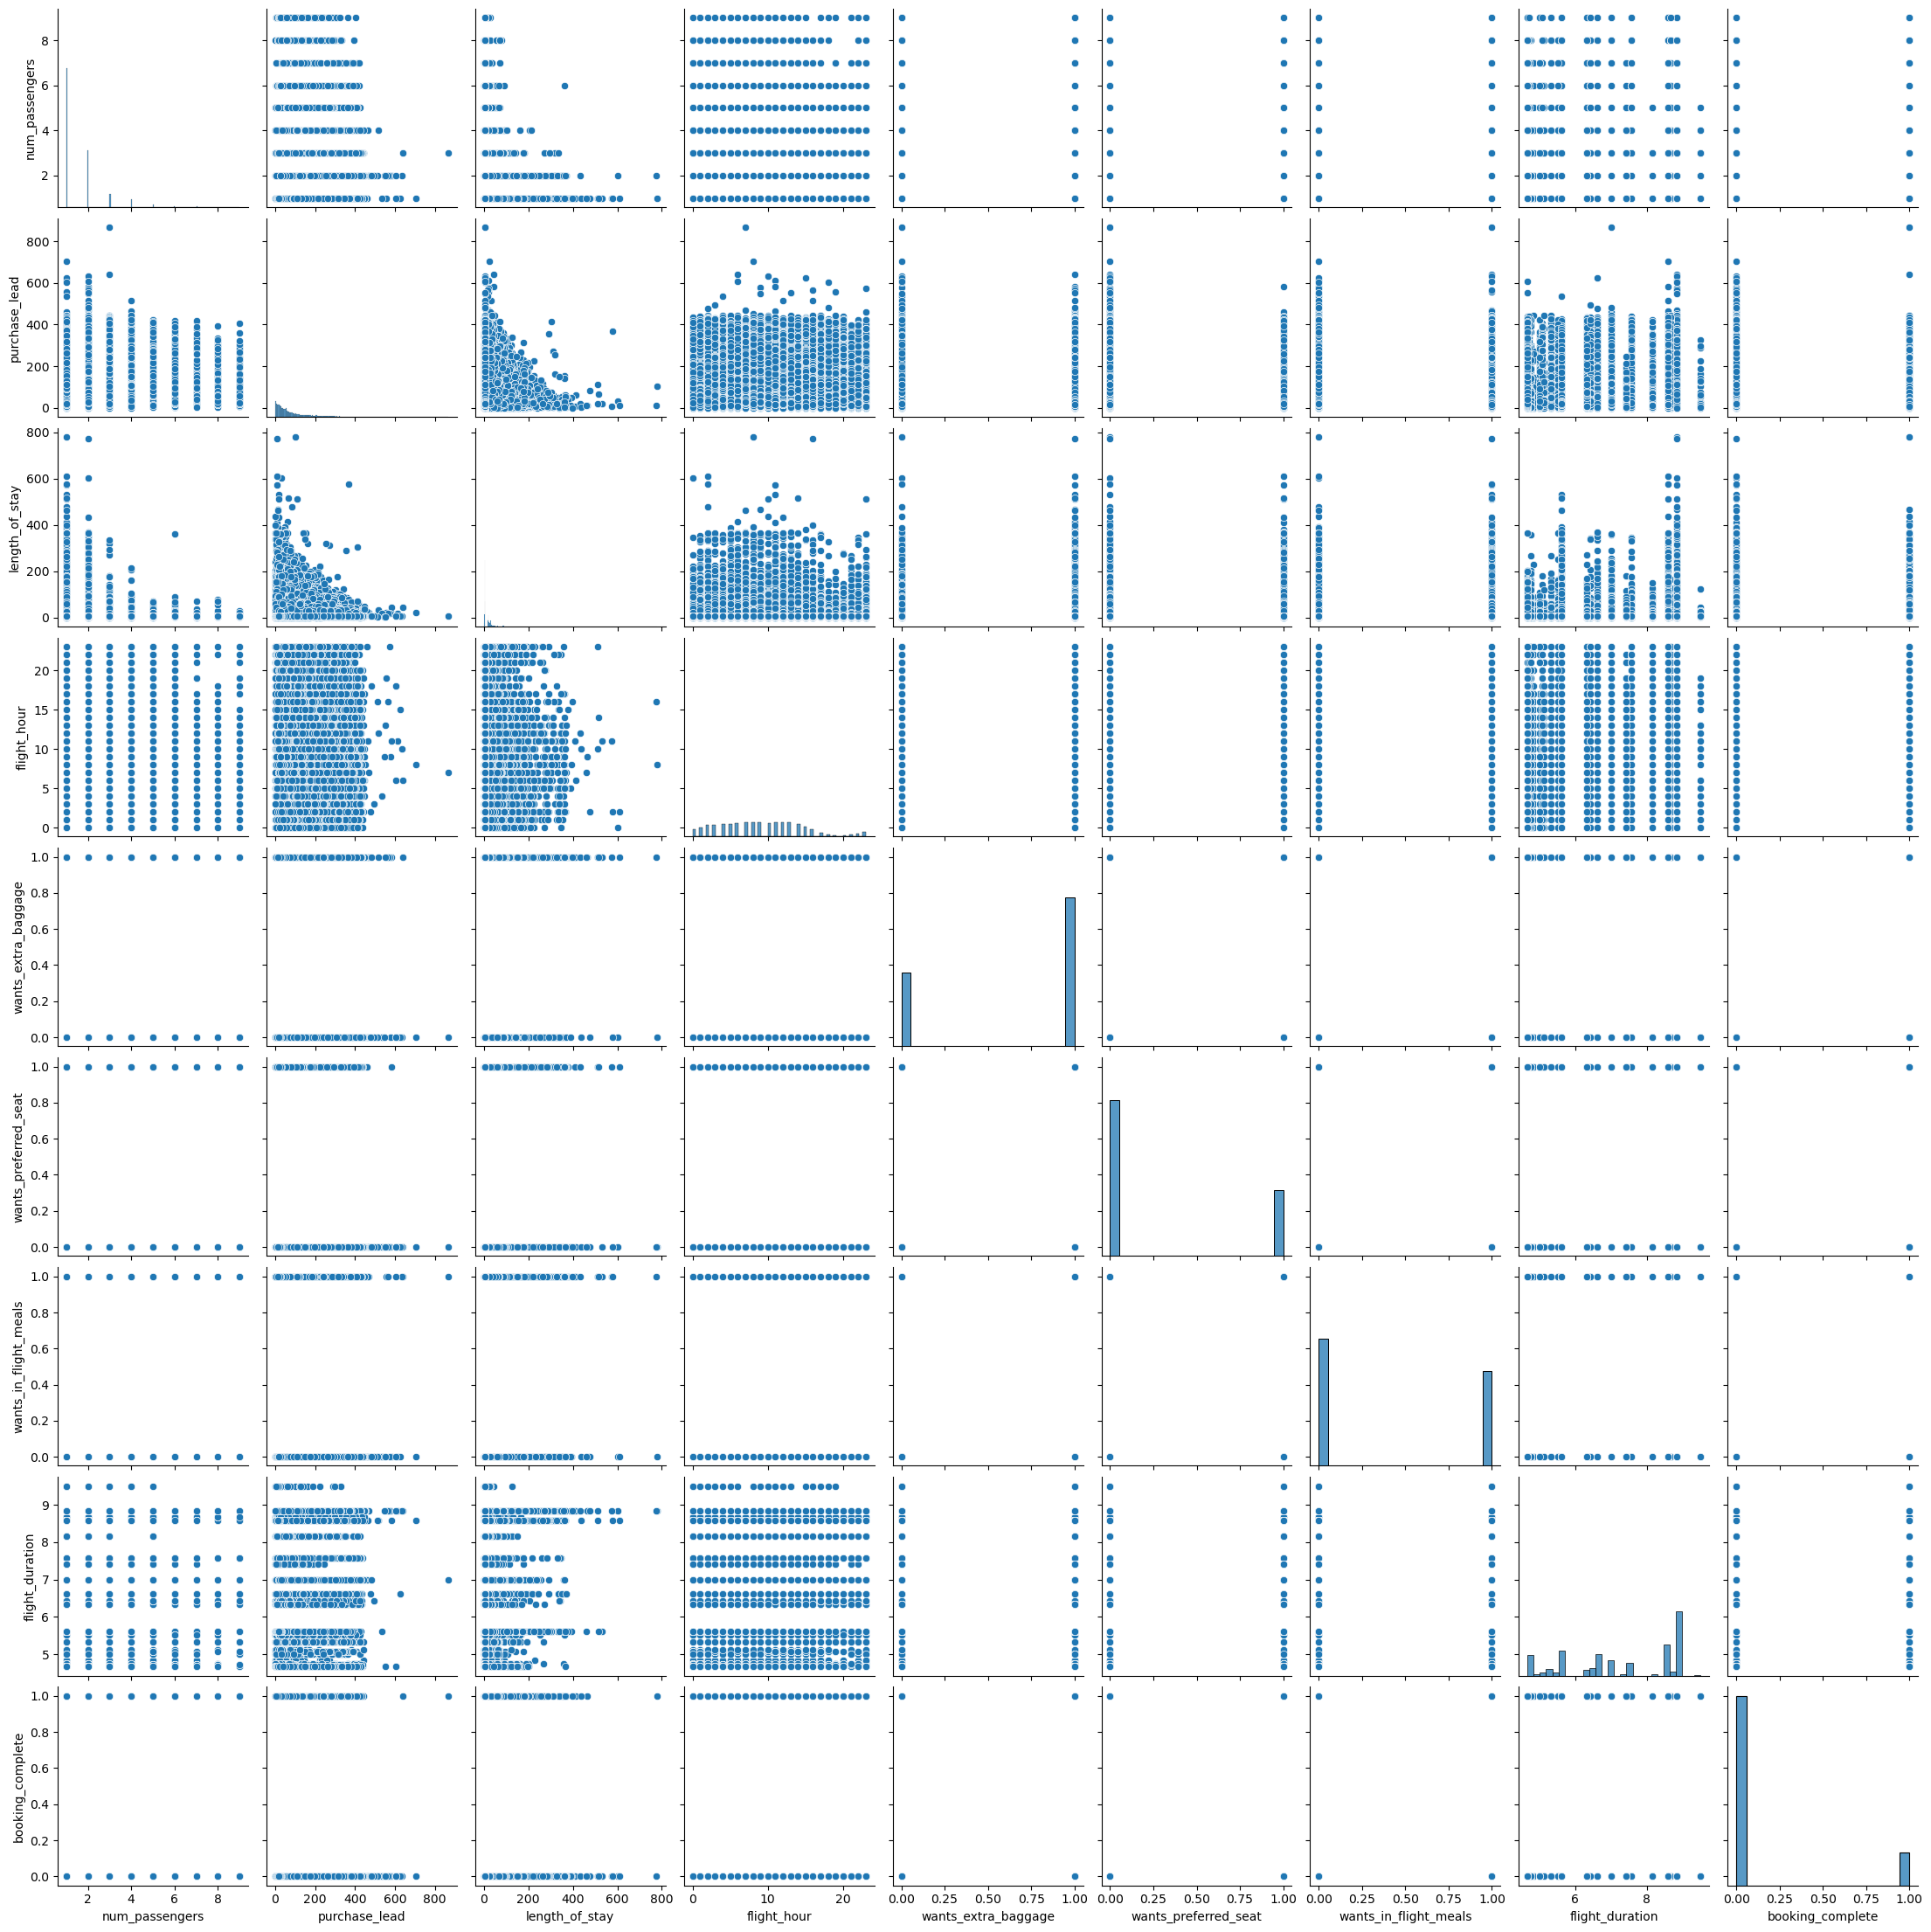

In [7]:
sns.pairplot(df)

## Data Preprocessing

#### check for null values

In [8]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

#### check for mispellings

In [9]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [10]:
print(df['sales_channel'].unique())
print(df['trip_type'].unique())
print(df['flight_day'].unique())
print(df['booking_origin'].unique())

['Internet' 'Mobile']
['RoundTrip' 'CircleTrip' 'OneWay']
['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']
['New Zealand' 'India' 'United Kingdom' 'China' 'South Korea' 'Japan'
 'Malaysia' 'Singapore' 'Switzerland' 'Germany' 'Indonesia'
 'Czech Republic' 'Vietnam' 'Thailand' 'Spain' 'Romania' 'Ireland' 'Italy'
 'Slovakia' 'United Arab Emirates' 'Tonga' 'R\x82union' '(not set)'
 'Saudi Arabia' 'Netherlands' 'Qatar' 'Hong Kong' 'Philippines'
 'Sri Lanka' 'France' 'Croatia' 'United States' 'Laos' 'Hungary'
 'Portugal' 'Cyprus' 'Australia' 'Cambodia' 'Poland' 'Belgium' 'Oman'
 'Bangladesh' 'Kazakhstan' 'Brazil' 'Turkey' 'Kenya' 'Taiwan' 'Brunei'
 'Chile' 'Bulgaria' 'Ukraine' 'Denmark' 'Colombia' 'Iran' 'Bahrain'
 'Solomon Islands' 'Slovenia' 'Mauritius' 'Nepal' 'Russia' 'Kuwait'
 'Mexico' 'Sweden' 'Austria' 'Lebanon' 'Jordan' 'Greece' 'Mongolia'
 'Canada' 'Tanzania' 'Peru' 'Timor-Leste' 'Argentina' 'New Caledonia'
 'Macau' 'Myanmar (Burma)' 'Norway' 'Panama' 'Bhutan' 'Norfolk Island'
 'Finland'

In [11]:
# Replace Mispellings
df['booking_origin'] = df['booking_origin'].replace('R\x82union','Reunion')

In [12]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


#### Remove Duplicates

In [13]:
print("Original Shape:" + str(df.shape))
print("Original Shape:" + str(df.drop_duplicates().shape))

Original Shape:(50000, 14)
Original Shape:(49281, 14)


In [14]:
df = df.drop_duplicates()

In [15]:
route_counts = df['route'].value_counts()
routes_over_x = route_counts[route_counts > 100]
df[df['route'].isin(routes_over_x.index)]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
82,1,Internet,RoundTrip,15,31,17,Mon,AKLKUL,Malaysia,0,0,0,8.83,1
83,1,Internet,RoundTrip,31,274,10,Tue,AKLKUL,Malaysia,1,0,0,8.83,0
84,1,Internet,RoundTrip,316,35,16,Tue,AKLKUL,Malaysia,1,0,0,8.83,0
85,2,Internet,RoundTrip,232,17,3,Tue,AKLKUL,Malaysia,1,1,1,8.83,0
86,1,Internet,RoundTrip,156,19,14,Mon,AKLKUL,Malaysia,1,0,0,8.83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


### Feature Selection

#### Dummy Variables

In [16]:
df2 = df.copy()

In [17]:
df2 = pd.get_dummies(df2,columns=["sales_channel","trip_type",'flight_day','booking_origin'],drop_first=True)

df2

,num_passengers,purchase_lead,length_of_stay,flight_hour,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,booking_origin_Afghanistan,booking_origin_Algeria,booking_origin_Argentina,booking_origin_Australia,booking_origin_Austria,booking_origin_Bahrain,booking_origin_Bangladesh,booking_origin_Belarus,booking_origin_Belgium,booking_origin_Bhutan,booking_origin_Brazil,booking_origin_Brunei,booking_origin_Bulgaria,booking_origin_Cambodia,booking_origin_Canada,booking_origin_Chile,booking_origin_China,booking_origin_Colombia,booking_origin_Croatia,booking_origin_Cyprus,booking_origin_Czech Republic,booking_origin_Czechia,booking_origin_Denmark,booking_origin_Egypt,booking_origin_Estonia,booking_origin_Finland,booking_origin_France,booking_origin_Germany,booking_origin_Ghana,booking_origin_Gibraltar,booking_origin_Greece,booking_origin_Guam,booking_origin_Guatemala,booking_origin_Hong Kong,booking_origin_Hungary,booking_origin_India,booking_origin_Indonesia,booking_origin_Iran,booking_origin_Iraq,booking_origin_Ireland,booking_origin_Israel,booking_origin_Italy,booking_origin_Japan,booking_origin_Jordan,booking_origin_Kazakhstan,booking_origin_Kenya,booking_origin_Kuwait,booking_origin_Laos,booking_origin_Lebanon,booking_origin_Macau,booking_origin_Malaysia,booking_origin_Maldives,booking_origin_Malta,booking_origin_Mauritius,booking_origin_Mexico,booking_origin_Mongolia,booking_origin_Myanmar (Burma),booking_origin_Nepal,booking_origin_Netherlands,booking_origin_New Caledonia,booking_origin_New Zealand,booking_origin_Nicaragua,booking_origin_Norfolk Island,booking_origin_Norway,booking_origin_Oman,booking_origin_Pakistan,booking_origin_Panama,booking_origin_Papua New Guinea,booking_origin_Paraguay,booking_origin_Peru,booking_origin_Philippines,booking_origin_Poland,booking_origin_Portugal,booking_origin_Qatar,booking_origin_Reunion,booking_origin_Romania,booking_origin_Russia,booking_origin_Saudi Arabia,booking_origin_Seychelles,booking_origin_Singapore,booking_origin_Slovakia,booking_origin_Slovenia,booking_origin_Solomon Islands,booking_origin_South Africa,booking_origin_South Korea,booking_origin_Spain,booking_origin_Sri Lanka,booking_origin_Svalbard & Jan Mayen,booking_origin_Sweden,booking_origin_Switzerland,booking_origin_Taiwan,booking_origin_Tanzania,booking_origin_Thailand,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,AKLDEL,1,0,0,5.52,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,AKLDEL,0,0,0,5.52,0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,

### Train Test Split

#### set target variables

In [18]:
y = df2['wants_extra_baggage']
X = df2.drop(['wants_extra_baggage', 'route'],axis=1)

#### train val test split 80/10/10%

### Evaluate Models Function

In [45]:
def evaluate_models(X, y, models, n_seeds=10, test_set_ind = False, plot_name = '0'):
    all_accuracy_scores = {}

    for name, model in models.items():
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
        roc_auc_scores = []

        for seed in range(n_seeds):
            # Split the data into training, validation, and testing sets with a different random seed
            X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)
            X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.11, random_state=seed)
            
            if test_set_ind == False:
                # Train the model
                model.fit(X_train, y_train)
                
                # Predict on the validation set
                pred = model.predict(X_val)

                # Evaluate the model
                accuracy_scores.append(accuracy_score(y_val, pred))
                precision_scores.append(precision_score(y_val, pred, average='macro'))
                recall_scores.append(recall_score(y_val, pred, average='macro'))
                f1_scores.append(f1_score(y_val, pred, average='macro'))
                try:
                    roc_auc_scores.append(roc_auc_score(y_val, pred, average='macro', multi_class='ovr'))
                except ValueError:
                    pass  # Handle multi-class cases for ROC AUC
            else: # Use y-test set instead of val
                    # Train the model
                model.fit(X_train, y_train)
                
                # Predict on the validation set
                pred = model.predict(X_test)

                # Evaluate the model
                accuracy_scores.append(accuracy_score(y_test, pred))
                precision_scores.append(precision_score(y_test, pred, average='macro'))
                recall_scores.append(recall_score(y_test, pred, average='macro'))
                f1_scores.append(f1_score(y_test, pred, average='macro'))
                try:
                    roc_auc_scores.append(roc_auc_score(y_test, pred, average='macro', multi_class='ovr'))
                except ValueError:
                    pass  # Handle multi-class cases for ROC AUC

        all_accuracy_scores[name] = accuracy_scores

        print(f"Model: {name}")
        print(f"Average Accuracy: {np.mean(accuracy_scores)}")
        print(f"Average Precision: {np.mean(precision_scores)}")
        print(f"Average Recall: {np.mean(recall_scores)}")
        print(f"Average F1 Score: {np.mean(f1_scores)}")
        
        if roc_auc_scores:
            print(f"Average ROC AUC Score: {np.mean(roc_auc_scores)}")
        
        if test_set_ind == False:
            # Confusion matrix and classification report for the last iteration
            print("Confusion Matrix:")
            print(confusion_matrix(y_val, pred))
            print("Classification Report:")
            print(classification_report(y_val, pred))

            # Precision-Recall Curve (for binary classification tasks)
            try:
                precision_recall = precision_recall_curve(y_val, pred, pos_label=1)
                plt.figure()
                plt.plot(precision_recall[0], precision_recall[1], marker='.')
                plt.xlabel('Recall')
                plt.ylabel('Precision')
                plt.title(f'Precision-Recall Curve for {name}')
                plt.show()
            except ValueError:
                pass

            print("\n")
        
        else: # Use y-test set instead of val
            # Confusion matrix and classification report for the last iteration
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, pred))
            print("Classification Report:")
            print(classification_report(y_test, pred))

            # Precision-Recall Curve (for binary classification tasks)
            try:
                precision_recall = precision_recall_curve(y_test, pred, pos_label=1)
                plt.figure()
                plt.plot(precision_recall[0], precision_recall[1], marker='.')
                plt.xlabel('Recall')
                plt.ylabel('Precision')
                plt.title(f'Precision-Recall Curve for {name}')
                plt.show()
            except ValueError:
                pass

            print("\n")
    
    # Plotting the box and whisker plot for accuracy scores
    plt.figure(figsize=(10, 6))
    plt.boxplot(all_accuracy_scores.values(), labels=all_accuracy_scores.keys())
    plt.ylabel('Accuracy')
    plt.xlabel('Models')
    plt.title('Model Accuracy Comparison')
    plt.savefig(f'model_accuracy_comparison_{plot_name}.png')
    plt.show()

### Model Selection

- Baseline Estimate

In [42]:
df['wants_extra_baggage'].value_counts(normalize=True)

wants_extra_baggage
1    0.668229
0    0.331771
Name: proportion, dtype: float64

##### Baseline is ~67%. Models must outperform this estimate to be considered a viable model for production.

- Trying Logistic Regression, RandomForestClassifier, and LightGBM algorithms, no hypertuning.

Model: Logistic Regression
Average Accuracy: 0.7100430416068867
Average Precision: 0.6685278625545747
Average Recall: 0.6242540186519249
Average F1 Score: 0.6301090945978324
Average ROC AUC Score: 0.6242540186519249
Confusion Matrix:
[[ 592 1040]
 [ 383 2864]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.36      0.45      1632
           1       0.73      0.88      0.80      3247

    accuracy                           0.71      4879
   macro avg       0.67      0.62      0.63      4879
weighted avg       0.69      0.71      0.68      4879



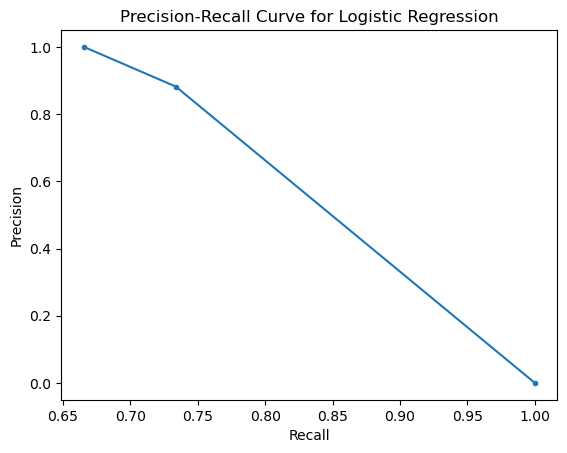



Model: Random Forest
Average Accuracy: 0.7128304980528798
Average Precision: 0.6705180590586362
Average Recall: 0.641818799350397
Average F1 Score: 0.6487291505747033
Average ROC AUC Score: 0.641818799350397
Confusion Matrix:
[[ 705  927]
 [ 479 2768]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.43      0.50      1632
           1       0.75      0.85      0.80      3247

    accuracy                           0.71      4879
   macro avg       0.67      0.64      0.65      4879
weighted avg       0.70      0.71      0.70      4879



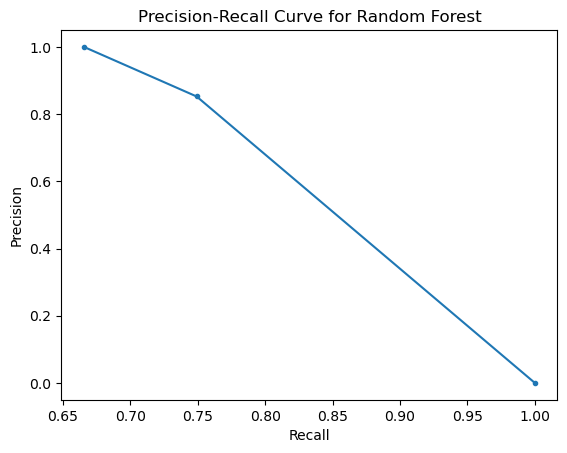



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 26310, number of negative: 13163
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 39473, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666532 -> initscore=0.692539
[LightGBM] [Info] Start training from score 0.692539
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 26378, number of negative: 13095
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

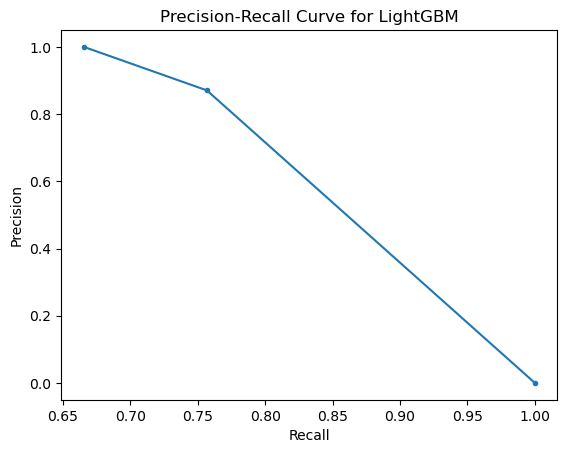

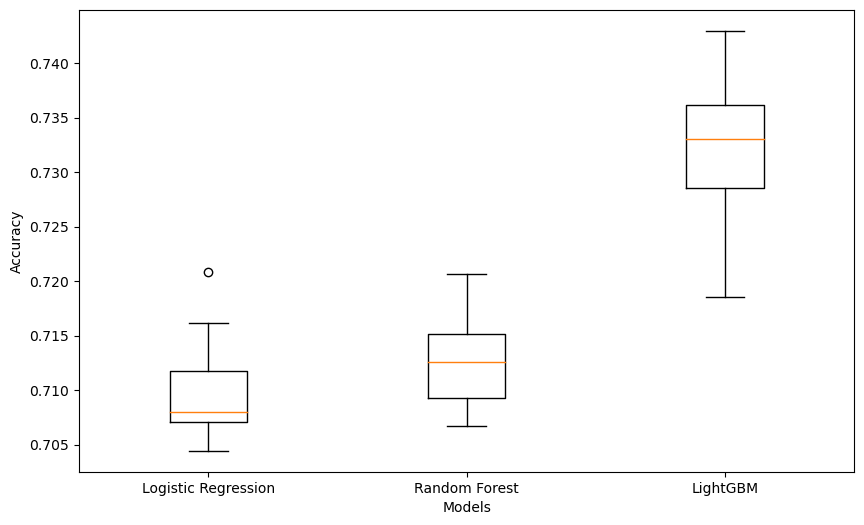

In [31]:
models1 = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "LightGBM": LGBMClassifier()
    }

evaluate_models(X,y, models1)

### Hyptertuning Models

In [34]:
### Takes 5 MINUTES TO RUN! Saved params below.
def get_param_grids():
    return {
        "Logistic Regression": {
            'C': [0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        },
        "Random Forest": {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        },
        "LightGBM": {
            'num_leaves': [31, 50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'n_estimators': [100, 200, 500]
        }
    }

# Define your models
models1 = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "LightGBM": LGBMClassifier()
}

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, random_state=42)

# Get the parameter grids
param_grids = get_param_grids()

# Hyperparameter tuning with RandomizedSearchCV
best_models = {}
for name, model in models1.items():
    print(f"Hyperparameter tuning for {name}")
    random_search = RandomizedSearchCV(model, param_grids[name], n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=4)
    random_search.fit(X_train, y_train)
    best_models[name] = random_search.best_estimator_
    print(f"Best parameters for {name}: {random_search.best_params_}")
    print(f"Best cross-validation score for {name}: {random_search.best_score_}")

best_models

Hyperparameter tuning for Logistic Regression


/Users/alecnaidoo/miniforge3/envs/python310mids/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alecnaidoo/miniforge3/envs/python310mids/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alecnaidoo/miniforge3/envs/python310mids/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alecnaidoo/miniforge3/envs/python310mids/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alecnaidoo/miniforge3/envs/python310mids/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Best cross-validation score for Logistic Regression: 0.7117745451082549
Hyperparameter tuning for Random Forest
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Best cross-validation score for Random Forest: 0.7297077278110279
Hyperparameter tuning for LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 21122, number of negative: 10417
[LightGBM] [Info] Number of positive: 21122, number of negative: 10417
[LightGBM] [Info] Number of positive: 21123, number of negative: 10416
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 211

{'Logistic Regression': LogisticRegression(C=0.1, solver='liblinear'),
 'Random Forest': RandomForestClassifier(max_depth=20, n_estimators=200),
 'LightGBM': LGBMClassifier(n_estimators=200)}

- Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
- Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
- Best parameters for LightGBM: {'num_leaves': 31, 'n_estimators': 200, 'learning_rate': 0.1}

In [35]:
 best_models

{'Logistic Regression': LogisticRegression(C=0.1, solver='liblinear'),
 'Random Forest': RandomForestClassifier(max_depth=20, n_estimators=200),
 'LightGBM': LGBMClassifier(n_estimators=200)}

### Evaluate Hypertune Models

Model: Logistic Regression
Average Accuracy: 0.7100430416068867
Average Precision: 0.6685278625545747
Average Recall: 0.6242540186519249
Average F1 Score: 0.6301090945978324
Average ROC AUC Score: 0.6242540186519249
Confusion Matrix:
[[ 592 1040]
 [ 383 2864]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.36      0.45      1632
           1       0.73      0.88      0.80      3247

    accuracy                           0.71      4879
   macro avg       0.67      0.62      0.63      4879
weighted avg       0.69      0.71      0.68      4879



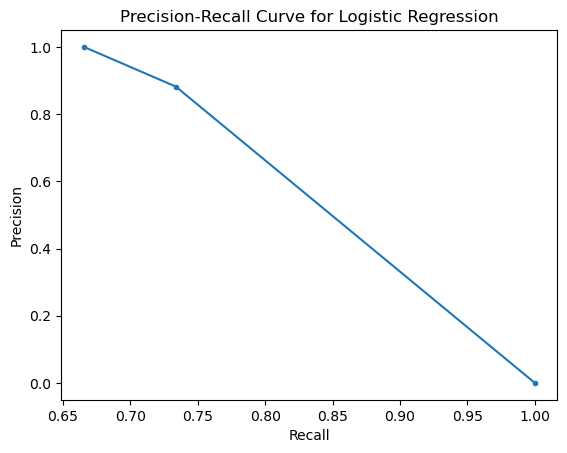



Model: HT Logistic Regression
Average Accuracy: 0.7093666734986679
Average Precision: 0.6673436923614731
Average Recall: 0.6240921382441154
Average F1 Score: 0.6299724236130736
Average ROC AUC Score: 0.6240921382441154
Confusion Matrix:
[[ 600 1032]
 [ 385 2862]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.37      0.46      1632
           1       0.73      0.88      0.80      3247

    accuracy                           0.71      4879
   macro avg       0.67      0.62      0.63      4879
weighted avg       0.69      0.71      0.69      4879



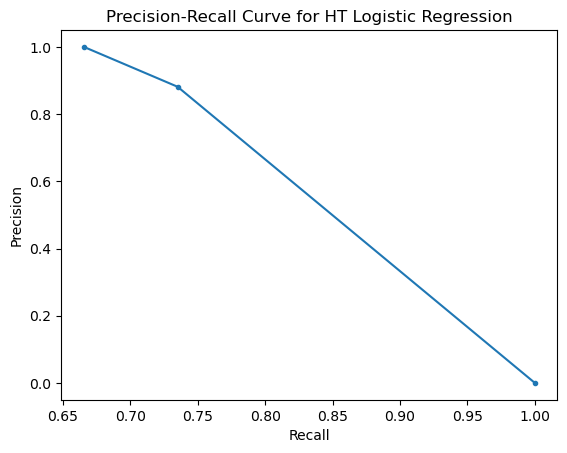



Model: Random Forest
Average Accuracy: 0.712789506046321
Average Precision: 0.67045936619651
Average Recall: 0.6423576069620721
Average F1 Score: 0.6492201795860723
Average ROC AUC Score: 0.642357606962072
Confusion Matrix:
[[ 689  943]
 [ 473 2774]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.42      0.49      1632
           1       0.75      0.85      0.80      3247

    accuracy                           0.71      4879
   macro avg       0.67      0.64      0.64      4879
weighted avg       0.70      0.71      0.70      4879



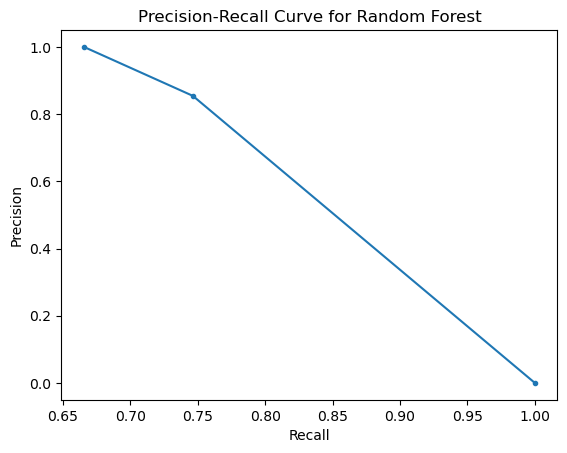



Model: HT Random Forest
Average Accuracy: 0.7282025005124002
Average Precision: 0.6966576804563739
Average Recall: 0.6439100982992394
Average F1 Score: 0.6523894236838246
Average ROC AUC Score: 0.6439100982992394
Confusion Matrix:
[[ 631 1001]
 [ 329 2918]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1632
           1       0.74      0.90      0.81      3247

    accuracy                           0.73      4879
   macro avg       0.70      0.64      0.65      4879
weighted avg       0.72      0.73      0.70      4879



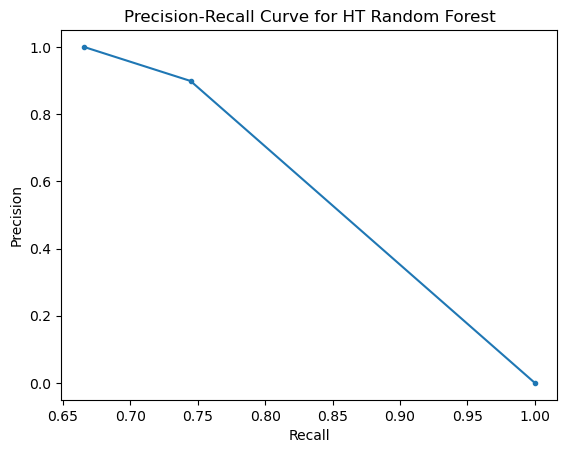



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 26310, number of negative: 13163
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 39473, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666532 -> initscore=0.692539
[LightGBM] [Info] Start training from score 0.692539
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 26378, number of negative: 13095
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

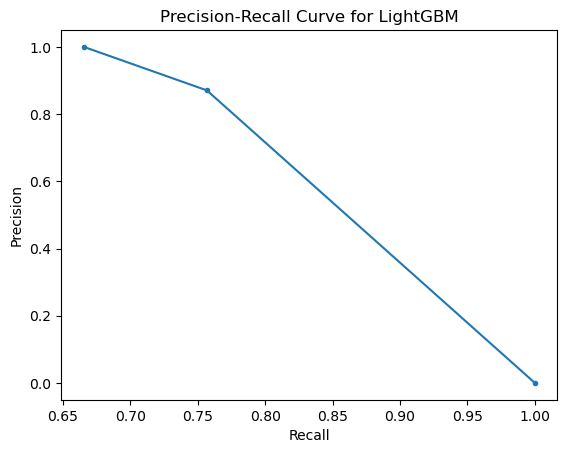



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 26310, number of negative: 13163
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 39473, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666532 -> initscore=0.692539
[LightGBM] [Info] Start training from score 0.692539
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 26378, number of negative: 13095
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

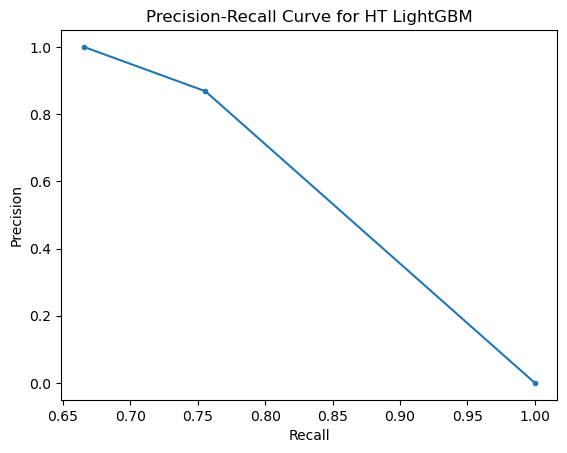

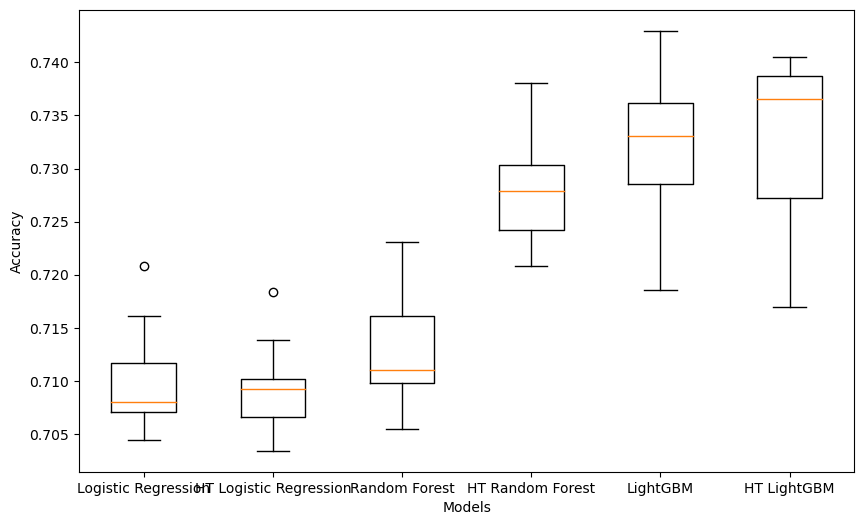

In [37]:
models2 = {
    "Logistic Regression": LogisticRegression(),
    "HT Logistic Regression": LogisticRegression(solver='liblinear', penalty='l2', C=0.1),
    "Random Forest": RandomForestClassifier(),
    "HT Random Forest": RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_depth=20),
    "LightGBM": LGBMClassifier(),
    "HT LightGBM": LGBMClassifier(num_leaves=31, n_estimators=200, learning_rate=0.1)
}

evaluate_models(X, y, models2)

#### Notes on Models
##### Logistic Regression
- Logistic Regression did not improve with the hypertuning, unfortunately. 
##### Random Forests
- Random Forests had a +2% performance increase with hypertuning.
##### LightGBM
- While not as large as the improvement seen with Random Forests, there was a slight improvement .05% in accuracy from light GBM. LightGBM is still the best performing of the 3 model types.

### Test Set Results

Model: Logistic Regression
Average Accuracy: 0.7112193142625279
Average Precision: 0.6695469637008725
Average Recall: 0.6243532752768961
Average F1 Score: 0.6303816512938687
Average ROC AUC Score: 0.624353275276896
Confusion Matrix:
[[ 583 1024]
 [ 399 2923]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.36      0.45      1607
           1       0.74      0.88      0.80      3322

    accuracy                           0.71      4929
   macro avg       0.67      0.62      0.63      4929
weighted avg       0.69      0.71      0.69      4929



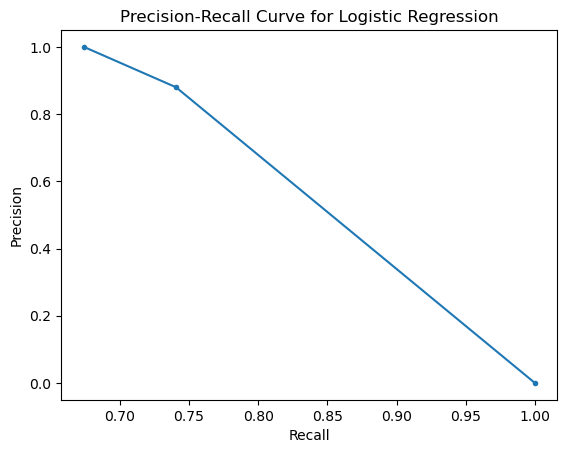



Model: HT Logistic Regression
Average Accuracy: 0.7115439237167782
Average Precision: 0.6697305968965588
Average Recall: 0.626110130767007
Average F1 Score: 0.6323959289388281
Average ROC AUC Score: 0.626110130767007
Confusion Matrix:
[[ 592 1015]
 [ 417 2905]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.37      0.45      1607
           1       0.74      0.87      0.80      3322

    accuracy                           0.71      4929
   macro avg       0.66      0.62      0.63      4929
weighted avg       0.69      0.71      0.69      4929



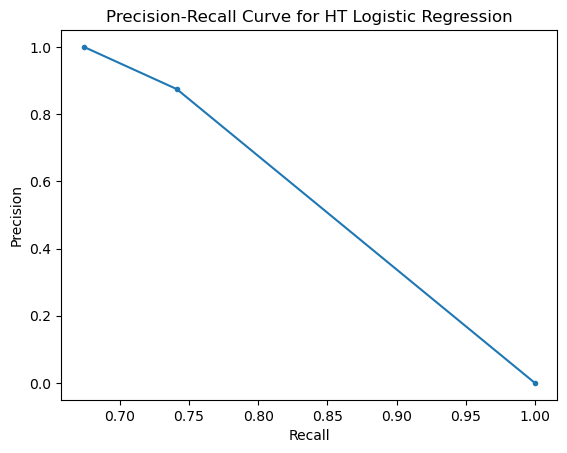



Model: Random Forest
Average Accuracy: 0.7147088658957191
Average Precision: 0.6724130672449311
Average Recall: 0.6453474491667417
Average F1 Score: 0.652306984113343
Average ROC AUC Score: 0.6453474491667415
Confusion Matrix:
[[ 709  898]
 [ 511 2811]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.44      0.50      1607
           1       0.76      0.85      0.80      3322

    accuracy                           0.71      4929
   macro avg       0.67      0.64      0.65      4929
weighted avg       0.70      0.71      0.70      4929



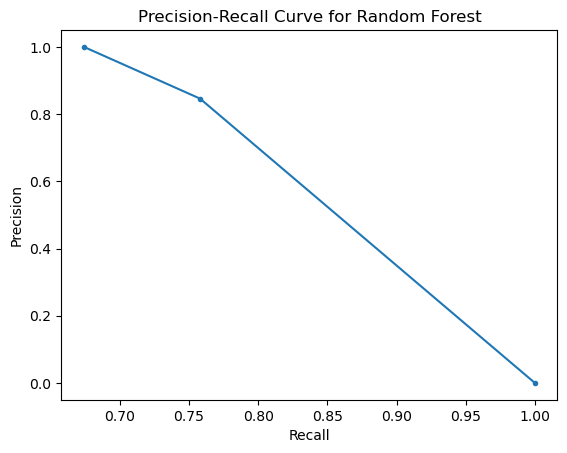



Model: HT Random Forest
Average Accuracy: 0.7311016433353622
Average Precision: 0.7003872884655614
Average Recall: 0.6465178788576127
Average F1 Score: 0.655433897947157
Average ROC AUC Score: 0.6465178788576127
Confusion Matrix:
[[ 645  962]
 [ 362 2960]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.40      0.49      1607
           1       0.75      0.89      0.82      3322

    accuracy                           0.73      4929
   macro avg       0.70      0.65      0.66      4929
weighted avg       0.72      0.73      0.71      4929



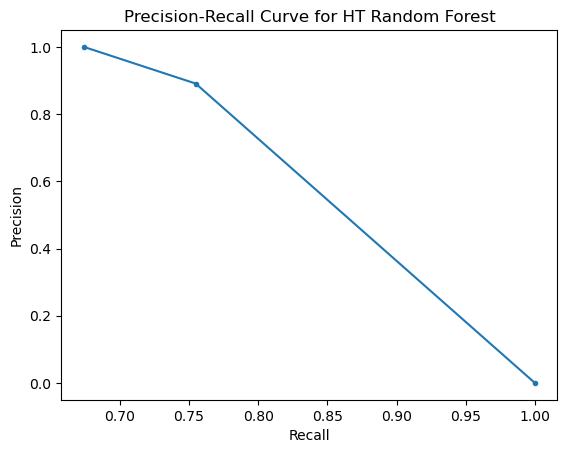



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 26310, number of negative: 13163
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 39473, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666532 -> initscore=0.692539
[LightGBM] [Info] Start training from score 0.692539
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 26378, number of negative: 13095
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

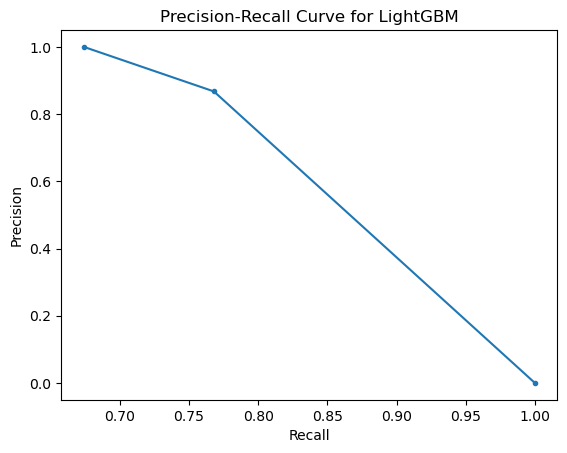



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 26310, number of negative: 13163
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 39473, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666532 -> initscore=0.692539
[LightGBM] [Info] Start training from score 0.692539
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 26378, number of negative: 13095
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

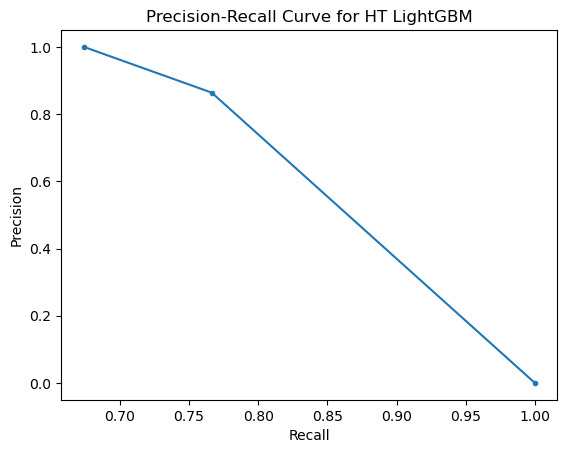

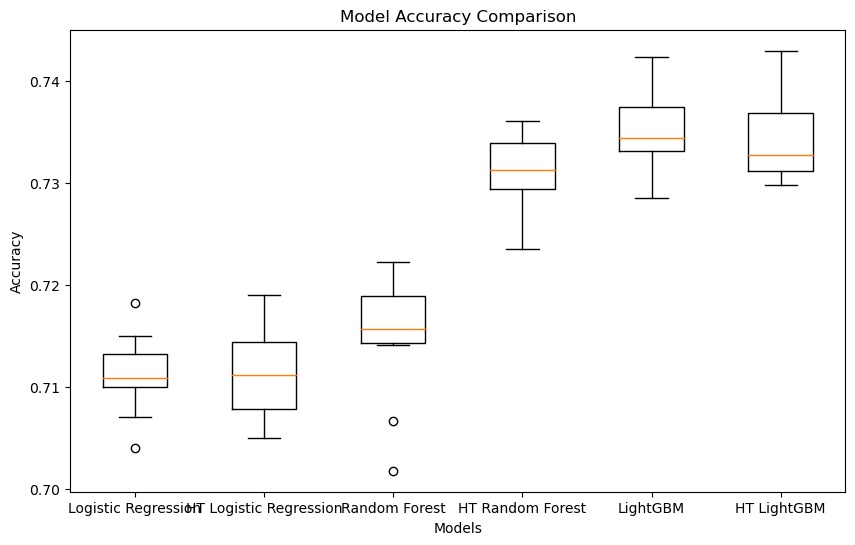

In [46]:
models2 = {
    "Logistic Regression": LogisticRegression(),
    "HT Logistic Regression": LogisticRegression(solver='liblinear', penalty='l2', C=0.1),
    "Random Forest": RandomForestClassifier(),
    "HT Random Forest": RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_depth=20),
    "LightGBM": LGBMClassifier(),
    "HT LightGBM": LGBMClassifier(num_leaves=31, n_estimators=200, learning_rate=0.1)
}

# Activate Test Set with last parameter 'test_set_ind'
evaluate_models(X, y, models2, test_set_ind = True, plot_name = 'final_test_results')

# Conclusion

- LightGBM (Default) performs the best on the test set results - 73% Accuracy. Compared to our baseline, this is a +6% accuracy improvement that can be utilized in production. By using this model, we can correctly identify 73% of customers that would want a baggage option with the given parameters. 

- This can be really useful. Our model can select customers that would want extra baggage by the other dimensions. If these customers do not select extra baggage, one strategy could be to offer them promotions that may increase their likelihood of purchase a baggage option, thereby raising the bottomline of baggage revenue. With AB Testing, this can be tested robustly, with a final revenue sizing estimation.
- Furthermore, this type of analysis can be conducted for other parameters like Preferred Seating, In-Flight Meals, etc. We could even perform this type of anlaysis for specific routes or booking origins.